# Python e Finanças

### Aplicações do Python para Finanças/Mercado Financeiros.

Bibliotecas usadas: 
1. pandas
2. pandas_datareader
3. numpy
4. matplotlib 

pandas_datareader foi utilizado para puxar cotações diretamente do yahoo finance.

### Vamos analisar o IBOV

In [36]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

start = '2022-01-01'
end = '2022-11-30'
cotacao_ibov = web.DataReader('^BVSP', data_source ='yahoo', start=start, end=end)
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-11-24,112612,108846,108846,111831,10296900,111831
2022-11-25,112025,108552,111831,108977,12309100,108977
2022-11-28,109476,108378,108977,108782,11492600,108782


### Analisando o Gráfico

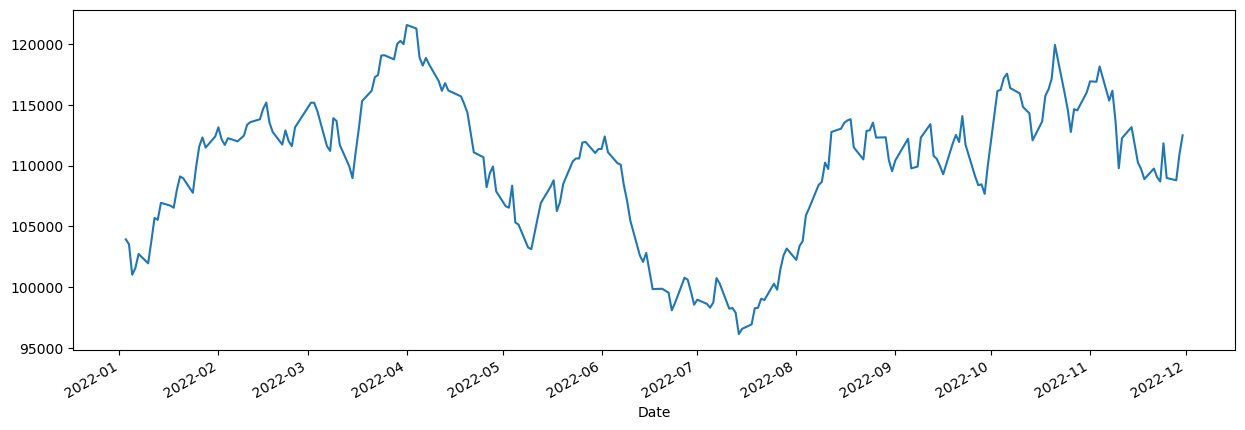

In [37]:
cotacao_ibov['Adj Close'].plot(figsize=(15,5))
plt.show()

### Retorno do IBOV

In [17]:
retorno_ibov = cotacao_ibov['Adj Close'][-1]/cotacao_ibov['Adj Close'][0] -1
print(f'O retorno do Ibov: { retorno_ibov:.2%}')

O retorno do Ibov: 8.24%


### Analisando com Média Móvel

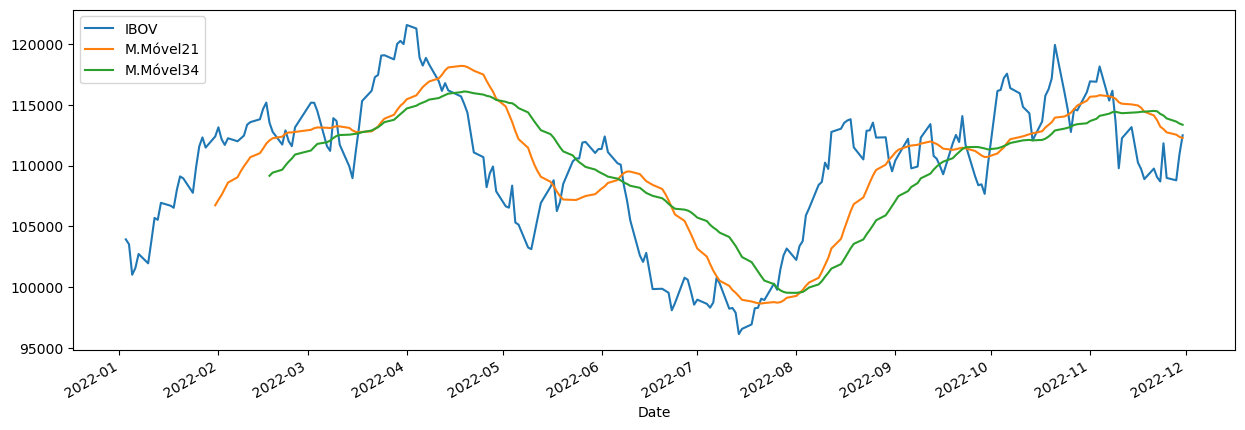

In [38]:
cotacao_ibov['Adj Close'].plot(figsize=(15,5), label='IBOV')
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label='M.Móvel21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label='M.Móvel34')
plt.legend()
plt.show()

### Comparando com uma carteira imaginária

In [28]:
carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


#### Cotações dos ativos da Carteira

In [39]:
cotacoes_carteira = pd.DataFrame() 
for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader(f'{ativo}.SA',data_source ='yahoo', start=start, end=end)['Adj Close']
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2022-01-03,99.930000,109.550003,6.72,17.489098,21.082424,13.44,14.242402,19.707716,25.740183,97.323700,91.871552,129.453796,93.551575
2022-01-04,99.570000,107.000000,6.61,17.603762,21.680294,12.91,14.018260,19.257143,24.080488,97.824203,92.930367,126.777748,93.401390
2022-01-05,97.099998,102.169998,6.42,17.479290,21.268644,12.40,13.065654,18.424561,22.967400,98.097198,89.016525,126.900673,91.242355
2022-01-06,97.849998,101.830002,6.25,17.728231,21.699898,12.21,13.018957,18.224457,22.709003,98.006187,91.275955,126.626434,91.195412
2022-01-07,98.699997,101.949997,6.22,17.986069,22.180153,11.93,12.766796,18.362673,21.973570,98.270096,92.580582,126.267090,90.979515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,108.199997,101.449997,3.60,15.620729,26.921713,13.03,9.660000,25.870001,12.180000,96.603874,97.934380,135.013565,98.522461
2022-11-25,105.070000,98.000000,3.42,15.331087,25.972357,12.42,8.960000,24.620001,11.450000,96.019905,98.778297,135.083145,97.559570
2022-11-28,105.150002,96.800003,3.32,15.311111,25.502676,12.14,8.670000,24.389999,11.370000,96.465309,99.076149,139.117538,97.331261


#### Ajustando os dados

In [30]:
cotacoes_carteira.info()
#se algum ativo estiver com valores vazios, uitilizar 'cotacoes_carteira.ffill()'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2022-01-03 to 2022-11-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  229 non-null    float64
 1   SMAL11  229 non-null    float64
 2   MGLU3   229 non-null    float64
 3   BBDC4   229 non-null    float64
 4   ITUB4   229 non-null    float64
 5   ENEV3   229 non-null    float64
 6   MOVI3   229 non-null    float64
 7   BPAC11  229 non-null    float64
 8   NTCO3   229 non-null    float64
 9   BCRI11  229 non-null    float64
 10  VILG11  229 non-null    float64
 11  KNRI11  229 non-null    float64
 12  XPLG11  229 non-null    float64
dtypes: float64(13)
memory usage: 25.0 KB


#### Acompanhando como que as ações foram individualmente

<AxesSubplot:xlabel='Date'>

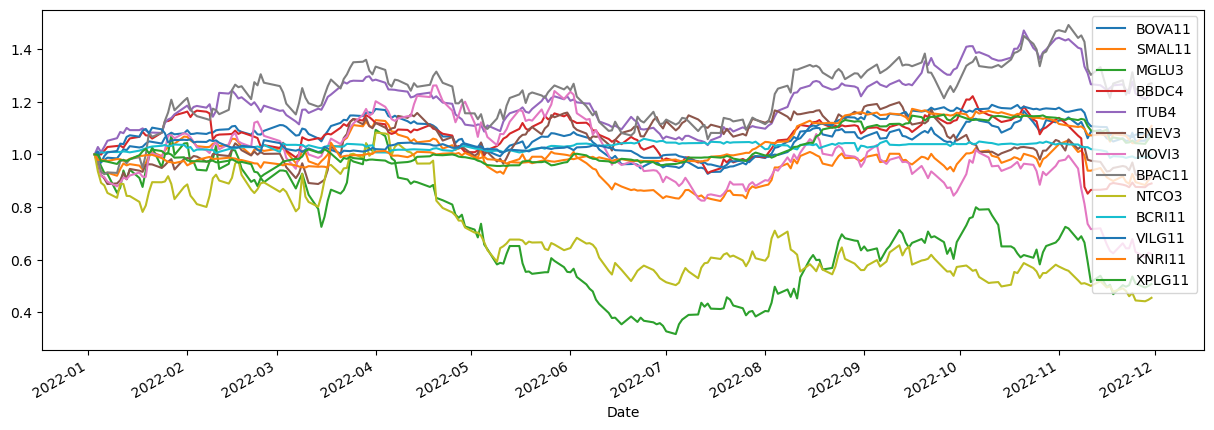

In [40]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15,5))

#### Calculando valor investido

In [42]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2022-01-03,9993.000031,10955.000305,6719.999790,1748.909760,2108.242416,4031.999874,1424.240208,1970.771599,2574.018288,9732.369995,9187.155151,12945.379639,9355.157471
2022-01-04,9956.999969,10700.000000,6610.000134,1760.376167,2168.029404,3872.999954,1401.826000,1925.714302,2408.048820,9782.420349,9293.036652,12677.774811,9340.139008
2022-01-05,9709.999847,10216.999817,6420.000076,1747.929001,2126.864433,3719.999886,1306.565380,1842.456055,2296.739960,9809.719849,8901.652527,12690.067291,9124.235535
2022-01-06,9784.999847,10183.000183,6250.000000,1772.823143,2169.989777,3663.000011,1301.895714,1822.445679,2270.900345,9800.618744,9127.595520,12662.643433,9119.541168
2022-01-07,9869.999695,10194.999695,6219.999790,1798.606873,2218.015289,3579.000092,1276.679611,1836.267281,2197.356987,9827.009583,9258.058167,12626.708984,9097.951508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,10819.999695,10144.999695,3599.999905,1562.072945,2692.171288,3908.999920,965.999985,2587.000084,1218.000031,9660.387421,9793.437958,13501.356506,9852.246094
2022-11-25,10506.999969,9800.000000,3420.000076,1533.108711,2597.235680,3726.000023,896.000004,2462.000084,1144.999981,9601.990509,9877.829742,13508.314514,9755.957031
2022-11-28,10515.000153,9680.000305,3319.999933,1531.111145,2550.267601,3642.000103,867.000008,2438.999939,1136.999989,9646.530914,9907.614899,13911.753845,9733.126068


#### Comparando a carteira de ações

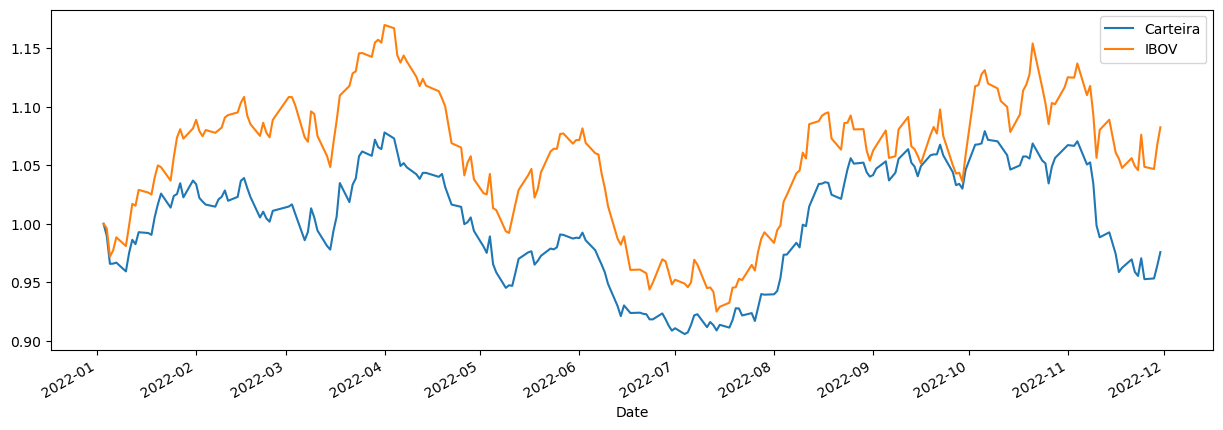

In [46]:
valor_investido['Total'] = valor_investido.sum(axis=1)
valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]
valor_investido_norm['Total'].plot(figsize=(15,5), label = 'Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()


In [48]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] -1
retorno_ibov = cotacao_ibov['Adj Close'][-1] /cotacao_ibov['Adj Close'][0] -1

print(f'O retorno da carteira foi: {retorno_carteira:.2%}')
print(f'O retorno da ibov foi: {retorno_ibov:.2%}')

O retorno da carteira foi: -2.42%
O retorno da ibov foi: 8.24%


#### Correlação da Carteira com o Ibov

In [49]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(f'{correlacao:.2%}')

89.50%
